Replace single percpetron with 10 perceptrons

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import random 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train/255, x_test/255

In [2]:
def label_to_output(label):
    o = [0]*10
    o[label] = 1
    return o

y_train_arrays = np.zeros((60000, 10))
for i, label in enumerate(y_train):
    y_train_arrays[i] = (label_to_output(label))

y_test_arrays = np.zeros((10000, 10))
for i, label in enumerate(y_test):
    y_test_arrays[i] = (label_to_output(label))


In [3]:
# class Model():
#     def __init__(self):
#         self.w1 = 2 * np.random.rand(28*28, 10) - 1
#         self.bias = 2 * np.random.rand(1, 1) - 1
    
#     def forward(self, x):
#         x = x.reshape(-1, 28*28)
#         y = np.matmul(x, self.w1) + self.bias
#         return sigmoid(y)
    
#     def back_prop(self, label, y, lr):
#         output_error = label - y
#         output_gradient = 
#         self.w1 = self.w1 + lr * x.reshape(-1, 28*28) * (output_error) * (1 - y)
#         self.bias = self.bias + lr * (output_error)

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))



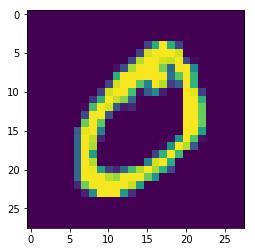

In [4]:
plt.imshow(x_train[1])

In [34]:
first_layer_weights = 2 * np.random.rand(28*28 + 1, 10) - 1
# print(first_layer_weights)
lr = 0.003
epoch = 2
# for e in range(epoch):
for i in range(60000):
    label = y_train_arrays[i]
    # Forward Pass
    x = x_train[i].reshape(-1, 28*28)

    # Add bias term to x
    input_layer = np.hstack((np.ones((x.shape[0], 1)), x))
    first_layer_outputs = np.matmul(input_layer, first_layer_weights)

    y = sigmoid(first_layer_outputs)
    loss = np.sum(1/(2*x.shape[0]) * (y - label)**2)

    # Back propagation:
    error = y - label 
    first_layer_derivatives = np.matmul(((error) * d_sigmoid(y)).transpose(), input_layer).transpose()

    first_layer_weights = first_layer_weights - lr * first_layer_derivatives

    # when there are multiple input data: 
    total_first_gradient = np.average(first_layer_derivatives, axis=0)

    # print(first_layer_outputs)
    # print(y)
    # print(d_sigmoid(first_layer_outputs))
    # print(error)
    # print(first_layer_outputs)
    # print((error * d_sigmoid(y)).shape)
    # print(input_layer)

    # Accuracy check:
    if i%1000 == 0:
        x = x_test.reshape(-1, 28*28)
        input_layer = np.hstack((np.ones((x.shape[0], 1)), x))
        first_layer_outputs = np.matmul(input_layer, first_layer_weights)
        y = sigmoid(first_layer_outputs)
        predictions = np.argmax(y, axis = 1)
        equals = predictions == y_test
        accuracy = np.sum(equals) / x.shape[0]
        print('Sample {}: Loss: {:.3}, Accuracy: {:.3%}'.format(i+1, loss, accuracy))
# print(first_layer_weights)

Sample 1: Loss: 1.47, Accuracy: 6.970%
Sample 1001: Loss: 0.865, Accuracy: 7.650%
Sample 2001: Loss: 1.13, Accuracy: 10.060%
Sample 3001: Loss: 0.477, Accuracy: 14.620%
Sample 4001: Loss: 0.066, Accuracy: 19.330%
Sample 5001: Loss: 1.15, Accuracy: 24.370%
Sample 6001: Loss: 0.0432, Accuracy: 30.340%
Sample 7001: Loss: 0.367, Accuracy: 35.920%
Sample 8001: Loss: 0.484, Accuracy: 40.060%
Sample 9001: Loss: 0.997, Accuracy: 43.980%
Sample 10001: Loss: 0.111, Accuracy: 47.760%
Sample 11001: Loss: 0.00903, Accuracy: 51.630%
Sample 12001: Loss: 0.66, Accuracy: 53.810%
Sample 13001: Loss: 0.37, Accuracy: 56.390%
Sample 14001: Loss: 0.0705, Accuracy: 58.550%
Sample 15001: Loss: 0.488, Accuracy: 59.990%
Sample 16001: Loss: 0.418, Accuracy: 61.390%
Sample 17001: Loss: 0.495, Accuracy: 62.700%
Sample 18001: Loss: 0.49, Accuracy: 64.040%
Sample 19001: Loss: 0.173, Accuracy: 65.430%
Sample 20001: Loss: 0.344, Accuracy: 66.280%
Sample 21001: Loss: 0.297, Accuracy: 67.180%
Sample 22001: Loss: 0.458, 

In [13]:
x = x_test.reshape(-1, 28*28)
input_layer = np.hstack((np.ones((x.shape[0], 1)), x))
first_layer_outputs = np.matmul(input_layer, first_layer_weights)
y = sigmoid(first_layer_outputs)
predictions = np.argmax(y, axis = 1)

equals = predictions == y_test
accuracy = np.sum(equals) / x.shape[0]

Text(0.5, 1.0, 'prediction: [1]')

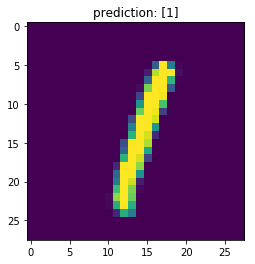

In [28]:
def predict(x):
    x = x.reshape(-1, 28*28)
    input_layer = np.hstack((np.ones((x.shape[0], 1)), x))
    first_layer_outputs = np.matmul(input_layer, first_layer_weights)
    y = sigmoid(first_layer_outputs)
    predictions = np.argmax(y, axis = 1)

    return predictions


index [i]
prediction = predict(x_test[index])

plt.imshow(x_test[index])
plt.title(f'prediction: {prediction}')